In [15]:
import pandas as pd
data=pd.read_csv('mammogram.csv')
data.head()
data.shape

(961, 6)

In [3]:
cols_with_missing=[col for col in data.columns if data[col].isnull().any()]
print(cols_with_missing)

[]


In [5]:
s=(data.dtypes=='object')
categorical=list(s[s].index)
print(categorical)

[]


In [9]:
num_true=len(data.loc[data['severity']==1])
print(num_true)
num_false=len(data.loc[data['severity']==0])
print(num_false)

445
516


                    BI_RADS_assessment       age  ...   density  severity
BI_RADS_assessment            1.000000 -0.003332  ... -0.013363 -0.003293
age                          -0.003332  1.000000  ... -0.020988 -0.077012
shape                         0.120916 -0.013238  ...  0.033802  0.027852
margin                        0.094359 -0.016590  ...  0.216024  0.107592
density                      -0.013363 -0.020988  ...  1.000000  0.102017
severity                     -0.003293 -0.077012  ...  0.102017  1.000000

[6 rows x 6 columns]


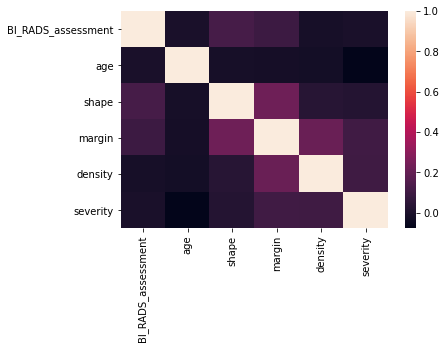

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [12]:
y=data['severity']
del(data['severity'])


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [16]:
from tensorflow import keras 
from keras import layers
model=keras.Sequential([
        layers.Dense(units=10,activation='relu',input_shape=[5])     ,
        layers.Dense(1,activation='sigmoid')           
])

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [18]:
early_stopping=keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [19]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=30,batch_size=50,callbacks=[early_stopping])

Epoch 1/30
16/16 [==============================] - 1s 26ms/step - loss: 3904.9821 - binary_accuracy: 0.4864 - val_loss: 3842.8491 - val_binary_accuracy: 0.4922
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 3512.2002 - binary_accuracy: 0.4369 - val_loss: 3461.0505 - val_binary_accuracy: 0.5026
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 3333.3278 - binary_accuracy: 0.4803 - val_loss: 3198.6113 - val_binary_accuracy: 0.5026
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 3222.9823 - binary_accuracy: 0.4777 - val_loss: 2929.2290 - val_binary_accuracy: 0.5026
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 2806.8177 - binary_accuracy: 0.4752 - val_loss: 2722.8584 - val_binary_accuracy: 0.5026
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 3137.7500 - binary_accuracy: 0.4477 - val_loss: 2518.9751 - val_binary_accuracy: 0.5026
Epoch 7/30
16/16 [=====================

Minimum Validation Loss: 4.2608


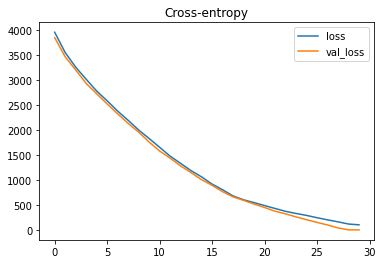

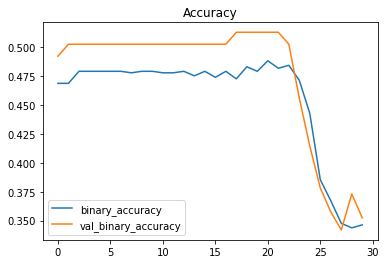

In [20]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title="Accuracy")
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [21]:
from tensorflow import keras 
from keras import layers
model=keras.Sequential([
        layers.Dense(units=128,activation='relu',input_shape=[5]) ,
        layers.Dense(units=64,activation='relu'),
        layers.Dense(1,activation='sigmoid')           
])

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
early_stopping=keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=30,batch_size=50,callbacks=[early_stopping])

Epoch 1/30
16/16 [==============================] - 1s 13ms/step - loss: 462.5298 - binary_accuracy: 0.5143 - val_loss: 360.6117 - val_binary_accuracy: 0.5181
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 251.6822 - binary_accuracy: 0.4613 - val_loss: 36.0531 - val_binary_accuracy: 0.5130
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 112.0041 - binary_accuracy: 0.5457 - val_loss: 33.5236 - val_binary_accuracy: 0.5440
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 131.0660 - binary_accuracy: 0.5510 - val_loss: 120.6985 - val_binary_accuracy: 0.6943
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 138.7689 - binary_accuracy: 0.6635 - val_loss: 43.6545 - val_binary_accuracy: 0.5492
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 66.1643 - binary_accuracy: 0.5350 - val_loss: 25.6560 - val_binary_accuracy: 0.5389
Epoch 7/30
16/16 [==============================] - 0s 4

Minimum Validation Loss: 17.5916


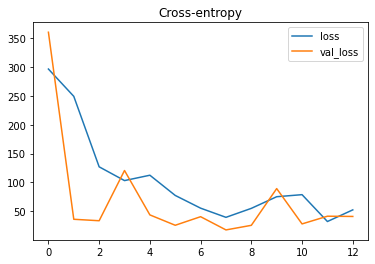

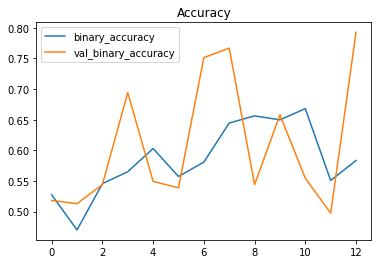

In [23]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title="Accuracy")
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [63]:
from tensorflow import keras 
from keras import layers
model=keras.Sequential([
        layers.Dense(units=64,activation='relu',input_shape=[5]) ,
        layers.Dense(units=28,activation='relu'),
        layers.Dense(units=28,activation='relu'),
        layers.Dense(1,activation='sigmoid')           
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
early_stopping=keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),validation_split=0.2,epochs=90,batch_size=15,callbacks=[early_stopping])



Epoch 1/90
41/41 [==============================] - 1s 6ms/step - loss: 128.6917 - binary_accuracy: 0.4812 - val_loss: 115.7891 - val_binary_accuracy: 0.4870
Epoch 2/90
41/41 [==============================] - 0s 2ms/step - loss: 105.4829 - binary_accuracy: 0.5193 - val_loss: 68.0020 - val_binary_accuracy: 0.7857
Epoch 3/90
41/41 [==============================] - 0s 2ms/step - loss: 60.4032 - binary_accuracy: 0.6909 - val_loss: 55.0468 - val_binary_accuracy: 0.7078
Epoch 4/90
41/41 [==============================] - 0s 2ms/step - loss: 49.6501 - binary_accuracy: 0.6278 - val_loss: 72.5344 - val_binary_accuracy: 0.5519
Epoch 5/90
41/41 [==============================] - 0s 2ms/step - loss: 32.1820 - binary_accuracy: 0.6929 - val_loss: 45.2701 - val_binary_accuracy: 0.6818
Epoch 6/90
41/41 [==============================] - 0s 3ms/step - loss: 48.2461 - binary_accuracy: 0.6349 - val_loss: 64.9858 - val_binary_accuracy: 0.7143
Epoch 7/90
41/41 [==============================] - 0s 2ms/st

Maximum Validation accuracy: 0.7857


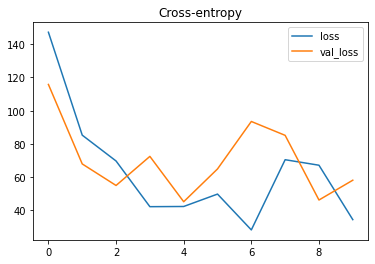

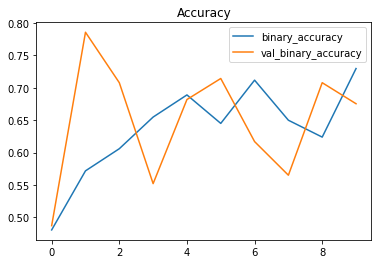

In [64]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title="Accuracy")
print("Maximum Validation accuracy: {:0.4f}".format(history_df['val_binary_accuracy'].max()));